INFO 3700 Group Project:
    Samantha Gunby, Kadidia Doumbia, Litzy Carbajal Ramirez, Daines Wallace
    

Importing the correct libraries and data is vital to have a project run. 

In [1]:
import sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv("heartDB.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Need to decided if we want this or not. It depends on what target means. Is the target saying that they do or don't have the cardio disease? If yes I say we keep to to show that we have a good amount of people who both do and don't have the disease. 

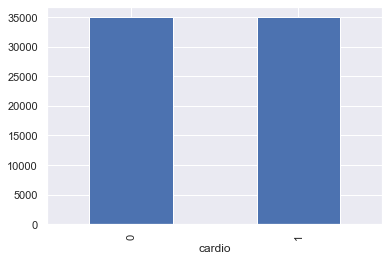

In [6]:
df.groupby("cardio").size().plot.bar()

We will want to decided which columns we want to have shown. with the following information

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Corolations - Litzy
Histograms are easier for the mind to quickly interpret. Having all the date broken down in to their separate histograms gives us the opportunity to quickly see how the information is organized (quantitative or qualitative) and if there are any significant outliers that we would want to take into consideration in our research.    

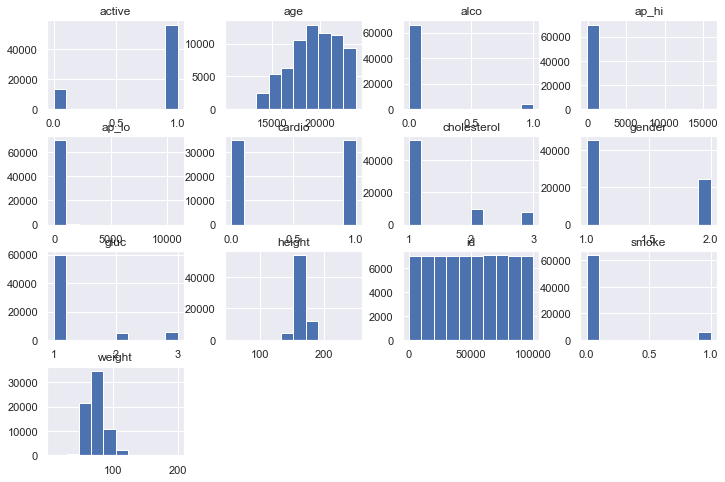

In [8]:
_ = df.hist(figsize=(12, 8))

In [9]:
corr = df.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


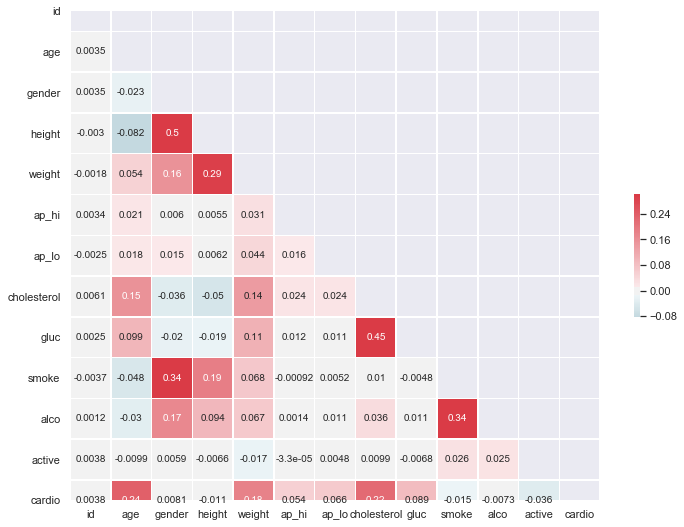

In [10]:
fig, ax = plt.subplots(figsize=(12, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=cmap, 
            vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .25})

Daines
Comparing the different variables and how they relate to a positive or negative result can help our program learn and determine if there is a correlation to be made between the data that we have. 

In [34]:
pos = df[df["cardio"] == 1]
neg = df[df["cardio"] == 0]

In [35]:
var_name = "cholesterol"

Text(0.5, 1.0, 'Overall Distribution of cholesterol')

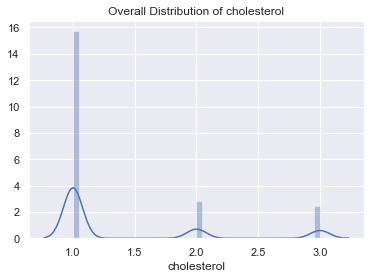

In [36]:
sns.distplot(df[var_name])
plt.title("Overall Distribution of {}".format(var_name))

Text(0.5, 1.0, 'Distribution of cholesterol stratified by Age')

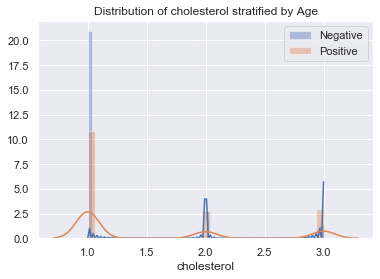

In [37]:
ax = sns.distplot(neg[var_name],label="Negative", color="C0")
sns.distplot(pos[var_name], label="Positive", color="C1")
ax.legend()
plt.title("Distribution of {} stratified by Age".format(var_name))

Setting up the program to interpret the information we have provided is vital to the success of our machine learning program.  

In [38]:
X = df.drop(["cardio"], axis=1)
y = df["cardio"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

It is always good to check your code to make sure the results are what you want. 

In [40]:
len(X_train)

56000

In [41]:
len(X_test)

14000

Kadidia 
We have created the trainging database to test the qualtiy of our programs ability to correctly predict our 'target'. 


In [42]:
import pickle
with open("heartDB.pkl", "rb") as f:
    (X_train, X_test, y_train, y_test) = pickle.load(f)

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [44]:
clf.fit(X_train, y_train)

C:\Users\sgunb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
pred = clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, pred)

0.7037857142857142

In [47]:
print(classification_report(y_test, pred, labels=[1]))

              precision    recall  f1-score   support

           1       0.73      0.64      0.68      6978

   micro avg       0.73      0.64      0.68      6978
   macro avg       0.73      0.64      0.68      6978
weighted avg       0.73      0.64      0.68      6978

